In [44]:
# !pip install ggplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import re

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# from ggplot import *
# from 

In [4]:
ad = pd.read_csv("HeightWeight.csv")   
df = ad.copy()
df.head(5)

,height,weight,diet,age
0,161.187053,88.454144,meat,60
1,178.692677,101.895004,meat,50
2,176.647599,97.503690,meat,61
3,205.353240,121.129281,meat,14
4,200.516263,117.490528,meat,44


In [5]:
# only standardize variable that are numeric

score = StandardScaler()

score.fit(df[["height","age"]])

df[["height","age"]] = score.transform(df[["height","age"]])

In [7]:
df.head()

,height,weight,diet,age
0,-0.957134,88.454144,meat,0.697371
1,0.205852,101.895004,meat,0.183086
2,0.069987,97.503690,meat,0.748800
3,1.977046,121.129281,meat,-1.668343
4,1.655701,117.490528,meat,-0.125486


In [6]:
ad = pd.read_csv("Amazonbook.csv", sep="\t")   
df = ad.copy()
df.head(2)

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2


In [7]:
df.isnull().sum()

Title           0
Author          1
List Price      1
Amazon Price    0
Hard/ Paper     0
NumPages        2
Publisher       1
Pub year        1
ISBN-10         0
Height          4
Width           5
Thick           1
Weight (oz)     9
dtype: int64

In [8]:
df = df.dropna()

df.isnull().sum(axis=0)

Title           0
Author          0
List Price      0
Amazon Price    0
Hard/ Paper     0
NumPages        0
Publisher       0
Pub year        0
ISBN-10         0
Height          0
Width           0
Thick           0
Weight (oz)     0
dtype: int64

## Explore

In [ ]:
# (ggplot(df, aes("List Price"))+geom_histogram(color="black")+theme_minimal())

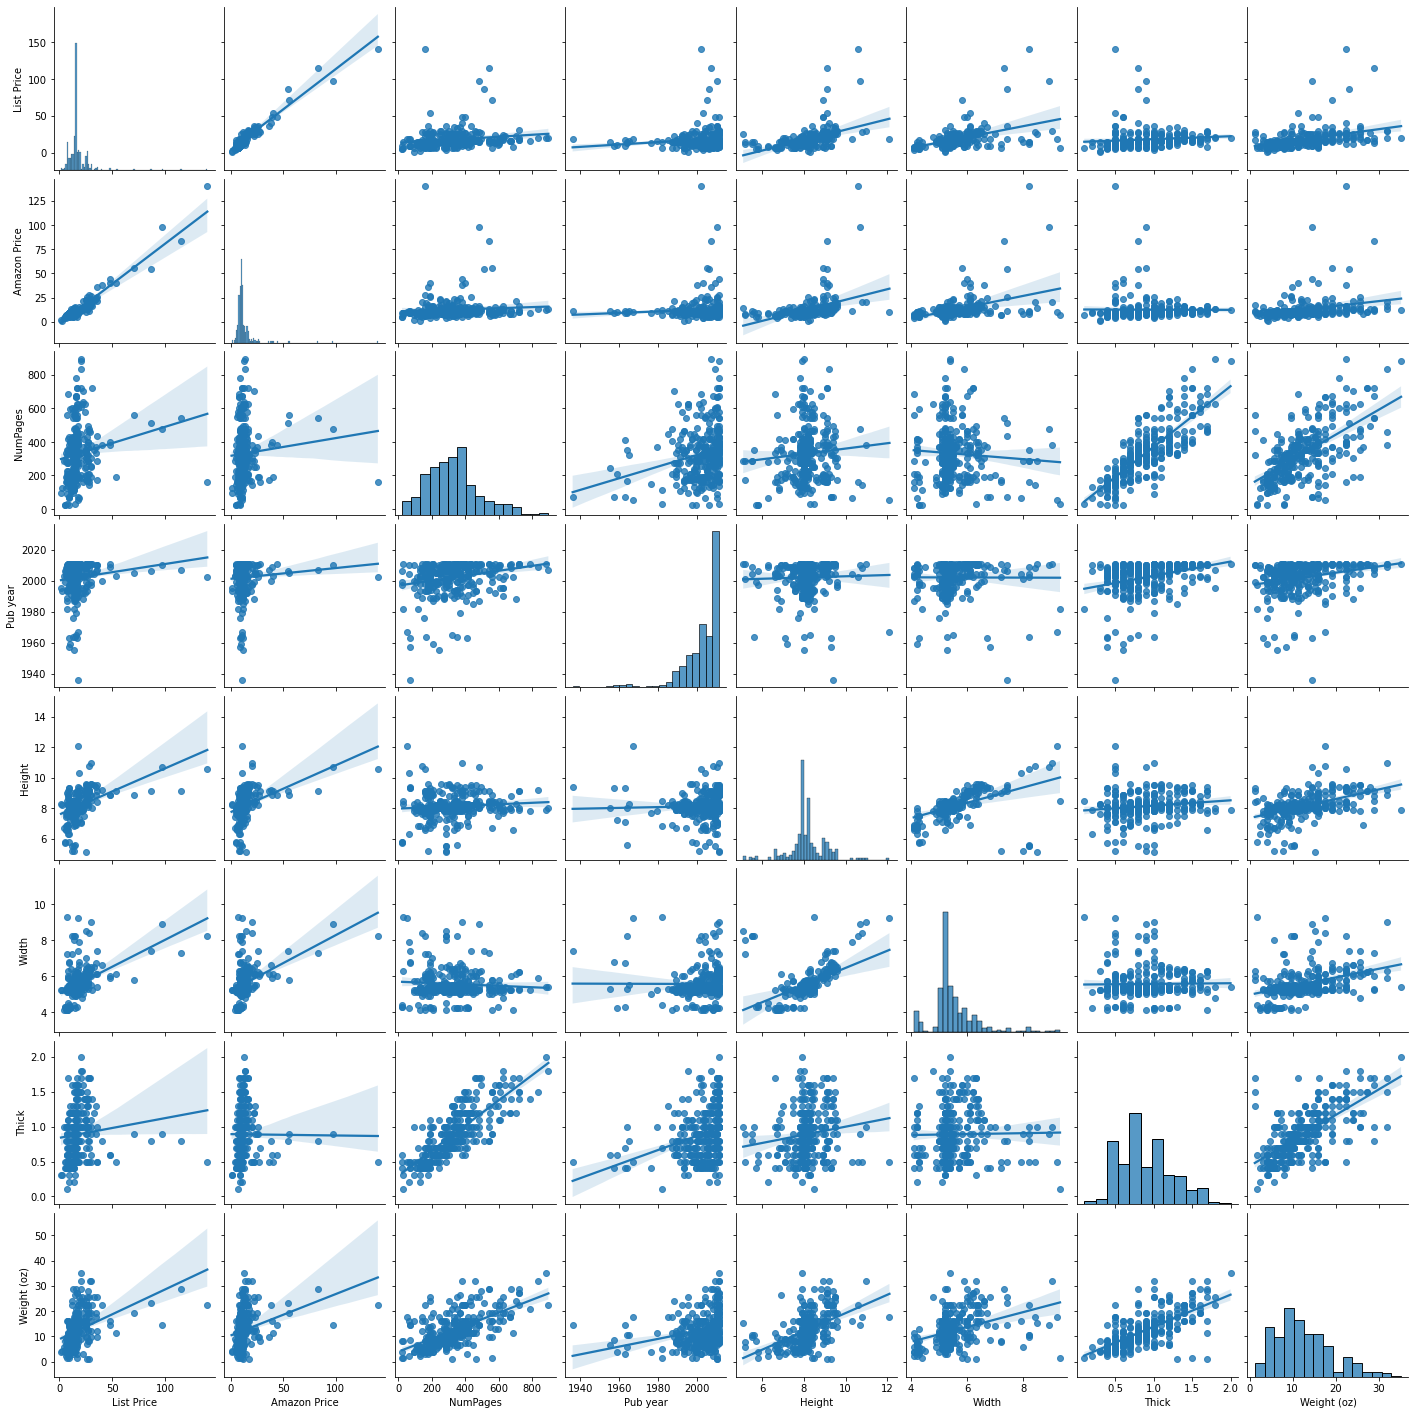

In [9]:
sns.pairplot(df, kind="reg")

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
List Price,310.0,17.934516,13.287255,1.50,13.4250,15.0,18.00,139.95
Amazon Price,310.0,12.587645,11.578859,0.77,8.5375,10.2,12.24,139.95
NumPages,310.0,330.577419,159.017713,24.00,208.0000,320.0,403.75,896.00
Pub year,310.0,2002.035484,10.732796,1936.00,1998.0000,2005.0,2010.00,2011.00
Height,310.0,8.130968,0.868884,5.10,7.9000,8.1,8.40,12.10
Width,310.0,5.553548,0.845416,4.10,5.2000,5.3,5.80,9.30
Thick,310.0,0.890000,0.355534,0.10,0.6000,0.8,1.10,2.00
Weight (oz),310.0,12.427742,6.622459,1.20,7.8000,11.2,16.00,35.20


## Model

In [11]:
predictors = ["List Price","NumPages","Weight (oz)","Thick","Height","Width"]

X= df[predictors] # bağımsız değişkenler
y= df["Amazon Price"]  # bağımlı değişken

In [12]:
zScore = StandardScaler()  # model oluşturduk.
zScore.fit(X)              # modelimizi bağımsız değişkenler ile fit ettik.
Xz = zScore.transform(X)   # modelimiz bağımsız değişkenler ile dönüştürdük.

In [13]:
LR_Model =LinearRegression()  # LinearReg modelimizi oluşturduk.
LR_Model.fit(Xz,y)      # dönüştürülmüş ve fit edilmiş bağımsız değişkenlerimizi ile bağımlı değişkeni modele soktuk.

LinearRegression()

## Model Evalution

In [14]:
price_pred = LR_Model.predict(Xz)  # modelimiz üzerinden bağımsız değişkenler ile tahminde bulunduk.
price_pred[1:10]

array([10.91587503,  0.64596322,  7.87491152, 21.75388566, 18.09350432,
       13.26001981, 10.59729274, 21.43797602,  9.48174291])

In [15]:
mean_squared_error(y, price_pred)  # gerçek değer ile modelimiz sonucu oluşan tahmin değeri arasındaki mse bulduk.

10.61233860175146

In [16]:
r2_score(y, price_pred)   # rmse hesapladık. Bu değer bağımsız değişkenlerin %92 oranında model deki değerleri karşılığıdını gösteriyor.

0.9205886088486431

## Assumption Checks

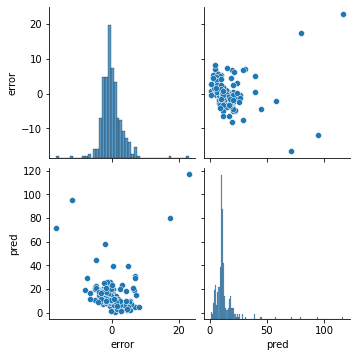

In [17]:
# make residual plot
assump = pd.DataFrame({"error":y-price_pred,
                      "pred":price_pred})
sns.pairplot(assump)

# what are we looking for? Heteroskedasticity and linearity

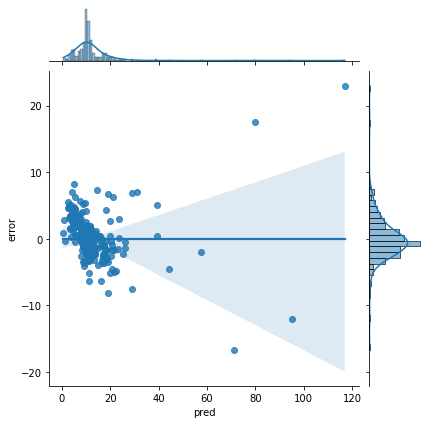

In [19]:
sns.jointplot(x = "pred", y = "error", data = assump, kind = "reg")

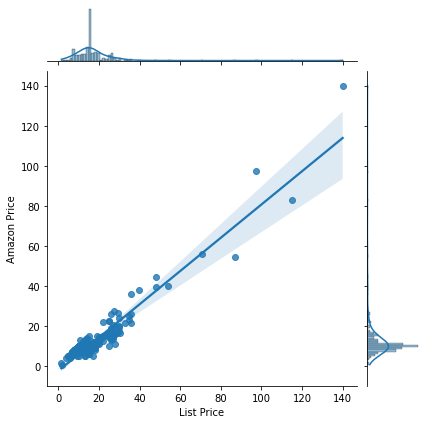

In [21]:
sns.jointplot(x = "List Price", y = "Amazon Price", data = df, kind = "reg")

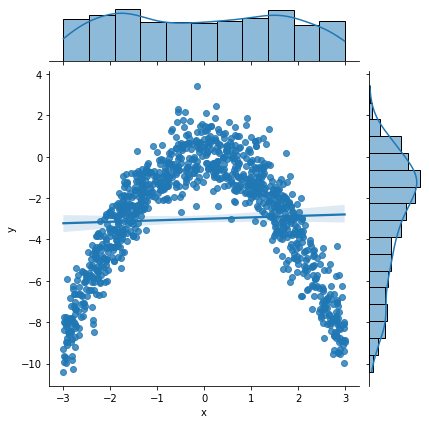

In [25]:
# medium relationship but Nonlinear

x= np.random.uniform(low=-3, high=3, size=1000)

y = -1*x**2 + np.random.normal(loc=0, scale=1, size=1000)

df = pd.DataFrame({"x": x,
                  "y": y})

sns.jointplot(x="x", y="y", data=df, kind="reg")

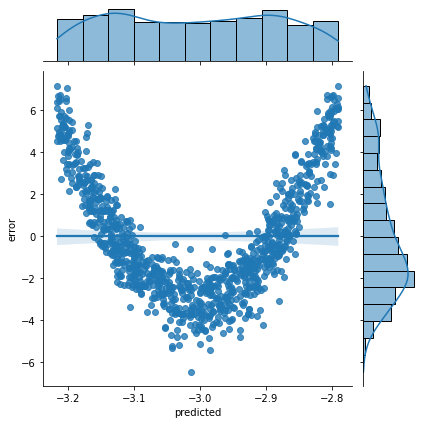

In [30]:
# what do you think the residual will look like?

# create model

LR= LinearRegression()

# seperate predictors and outcome

X = np.array(df["x"]).reshape(-1,1) # we have to do this because there is only 1 predictor.
y = df["y"]

# fit model
LR.fit(X,y)

# grab fitted values
predicted = LR.predict(X)

# plot residual graph
assump = pd.DataFrame({"error":predicted-y, "predicted":predicted})

sns.jointplot(x="predicted", y="error", data=assump, kind="reg")

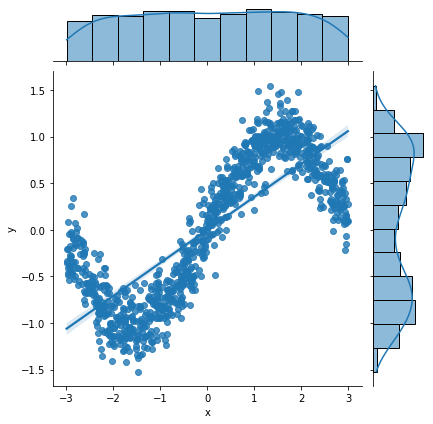

In [31]:
# strong relationship but Nonlinear

x= np.random.uniform(low=-3, high=3, size=1000)

y = np.sin(x) + np.random.normal(loc=0, scale=0.2, size=1000)

df = pd.DataFrame({"x": x,
                  "y": y})

sns.jointplot(x="x", y="y", data=df, kind="reg")

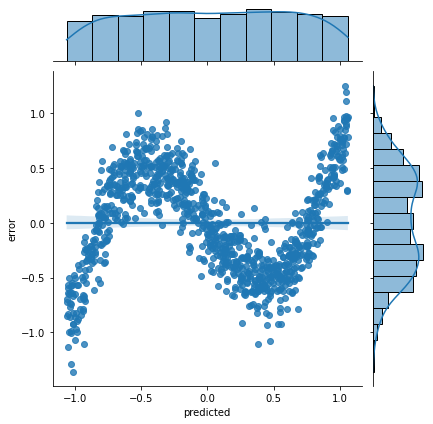

In [33]:
# what do you think the residual will look like?

# create model

LR= LinearRegression()

# seperate predictors and outcome

X = np.array(df["x"]).reshape(-1,1) # we have to do this because there is only 1 predictor.
y = df["y"]

# fit model
LR.fit(X,y)

# grab fitted values
predicted = LR.predict(X)

# plot residual graph
assump = pd.DataFrame({"error":predicted-y, "predicted":predicted})

sns.jointplot(x="predicted", y="error", data=assump, kind="reg")

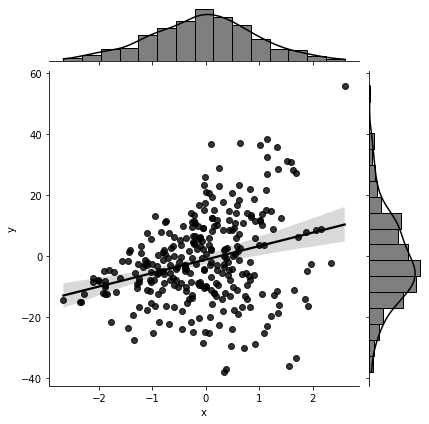

In [40]:
# STRONG relationship, small data but linear

x= np.random.normal(loc=0, scale=1, size=300)

y = x*5.4 + (np.random.normal(loc=0, scale=0.1+5*(x-min(x))))

df = pd.DataFrame({"x": x, "y": y})

sns.jointplot(x="x", y="y", data=df, kind="reg", color="black")

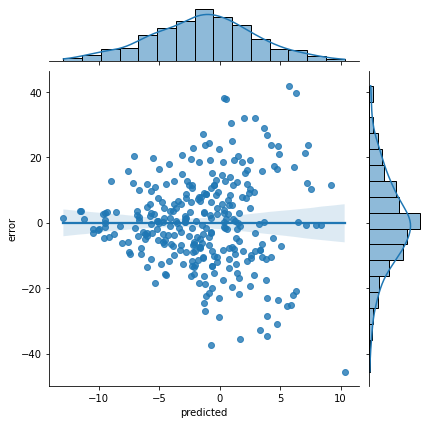

In [43]:
LR= LinearRegression()

# seperate predictors and outcome

X = np.array(df["x"]).reshape(-1,1) # we have to do this because there is only 1 predictor.
y = df["y"]

# fit model
LR.fit(X,y)

# grab fitted values
predicted = LR.predict(X)

# plot residual graph
assump = pd.DataFrame({"error":predicted-y, "predicted":predicted})

sns.jointplot(x="predicted", y="error", data=assump, kind="reg")

In [50]:
coefficients=pd.DataFrame({"Coef":LR_Model.coef_, "Name":predictors})

coefficients=coefficients.append({"Coef":LR_Model.intercept_, "Name":"intercept"}, ignore_index=True)

In [51]:
coefficients

,Coef,Name
0,11.401887,List Price
1,0.231519,NumPages
2,-0.419686,Weight (oz)
3,-1.159632,Thick
4,-0.098886,Height
5,-0.197179,Width
6,12.587645,intercept


## Predict

In [54]:
newBook = np.array([12.45, 300, 10,.8, 8, 5]).reshape(1,-1)
newBookz = zScore.transform(newBook)

LR_Model.predict(newBookz)

array([8.42151431])

## Bey(sklearn)

In [70]:
b = pd.read_csv("Beyonce.csv")

b.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Beyoncé,0.386,0.28800,1,-18.513,1,0.0602,0.533,0.01670,0.1410,0.399,43850,balance (mufasa interlude)
1,2,Beyoncé,0.484,0.36300,5,-8.094,0,0.0368,0.645,0.00000,0.1250,0.201,226479,BIGGER
2,3,Beyoncé,0.537,0.24700,2,-17.750,1,0.0793,0.199,0.00001,0.4230,0.170,46566,the stars (mufasa interlude)
3,4,Beyoncé,0.672,0.69600,4,-6.693,0,0.1770,0.200,0.02750,0.0736,0.642,162353,FIND YOUR WAY BACK
4,5,Beyoncé,0.000,0.00515,9,-22.612,0,0.0000,0.524,0.95000,0.1140,0.000,13853,uncle scar (scar interlude)


## Model

In [71]:
# Can we predict danceabilitiy?

predictors = ["energy","key","loudness","speechiness", "acousticness","instrumentalness","liveness","valence"]

X= b[predictors] # bağımsız değişkenler
y= b["danceability"]  # bağımlı değişken

In [72]:
zScore = StandardScaler()

cont_predictors = ["energy","key","loudness","speechiness", "acousticness","instrumentalness","liveness","valence"]

zScore.fit(X[cont_predictors])

X[cont_predictors] = zScore.transform(X[cont_predictors])

X

,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,-1.613859,-1.188831,-3.163635,-0.749321,1.351041,-0.014911,-0.466524,-0.273238
1,-1.253561,-0.063507,-0.206522,-0.904636,1.814286,-0.174797,-0.540071,-1.148500
2,-1.810823,-0.907500,-2.947081,-0.622547,-0.030419,-0.174697,0.829752,-1.285536
3,0.346165,-0.344838,0.191109,0.025926,-0.026283,0.088489,-0.776343,0.800947
4,-2.972666,1.061817,-4.327010,-1.148892,1.313816,8.920519,-0.590635,-2.037023
...,...,...,...,...,...,...,...,...
469,-1.066206,0.217824,-0.195169,-0.541571,0.527956,-0.174797,-0.301042,0.124608
470,-2.777864,-0.063507,-3.813581,4.180935,0.896070,-0.174797,-0.553862,0.354475
471,-1.724351,1.624479,-1.539337,-0.789145,2.885538,-0.174797,-0.006851,-0.662243
472,0.668032,-0.063507,0.220910,0.118850,0.912614,-0.174797,-0.268865,2.153624


## Predictions

0.012536894948932373


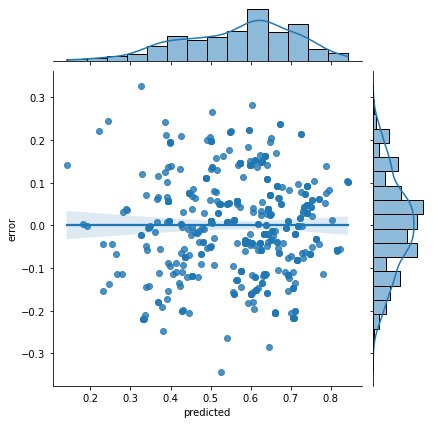

In [73]:
BEY_Mod= LinearRegression()

# seperate predictors and outcome

#X = np.array(df["x"]).reshape(-1,1) # we have to do this because there is only 1 predictor.
#y = df["y"]

# fit model
BEY_Mod.fit(X,y)

# grab fitted values
dance_pred = BEY_Mod.predict(X)

print(mean_squared_error(y, dance_pred))

# plot residual graph
assump = pd.DataFrame({"error":dance_pred-y, "predicted":dance_pred})

sns.jointplot(x="predicted", y="error", data=assump, kind="reg")

<AxesSubplot:xlabel='danceability', ylabel='Count'>

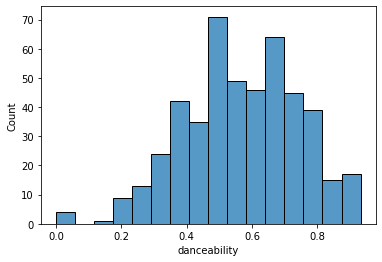

In [81]:
sns.histplot(x="danceability", data=b)

In [82]:
r2_score(y,dance_pred)

0.5994967241704979

In [75]:
coefficients = pd.DataFrame({"Coef":BEY_Mod.coef_, "Name":predictors})

coefficients = coefficients.append({"Coef":BEY_Mod.intercept_, "Name":"intercept"}, ignore_index=True)

coefficients

,Coef,Name
0,-0.034829,energy
1,-0.005198,key
2,0.022993,loudness
3,-0.000301,speechiness
4,-0.068482,acousticness
5,-0.007033,instrumentalness
6,-0.029896,liveness
7,0.091860,valence
8,0.567572,intercept
